# Projet PYTHON
Nanthakumar Olivier et Boulanger Thomas

## 1) Premier modèle

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


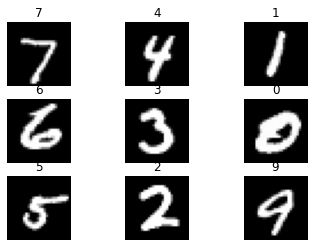

In [1]:
import numpy as np
from scipy import special


dt = np.dtype('uint32')
dt = dt.newbyteorder('>')  

f = open('train-images-idx3-ubyte', mode = 'rb')
x = f.read(16)
y = np.frombuffer(x, dtype = dt)
truc, nb_im, nb_rows, nb_cols = y
x = f.read(nb_rows*nb_cols*nb_im)
f.close()
train_images = np.frombuffer(x, dtype = 'ubyte').reshape(nb_im, nb_rows, nb_cols)

f = open('train-labels-idx1-ubyte', mode = 'rb')
x = f.read(8)
y = np.frombuffer(x, dtype = dt)
truc, nb_exemples = y
x = f.read(nb_exemples)
f.close()
train_labels = np.frombuffer(x, dtype = 'ubyte')

f = open('t10k-images-idx3-ubyte', mode = 'rb')
x = f.read(16)
y = np.frombuffer(x, dtype = dt)
truc, nb_im, nb_rows, nb_cols = y
x = f.read(nb_rows*nb_cols*nb_im)
f.close()
test_images = np.frombuffer(x, dtype = 'ubyte').reshape(nb_im, nb_rows, nb_cols)

f = open('t10k-labels-idx1-ubyte', mode = 'rb')
x = f.read(8)
y = np.frombuffer(x, dtype = dt)
truc, nb_exemples = y
x = f.read(nb_exemples)
f.close()
test_labels = np.frombuffer(x, dtype = 'ubyte')


print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(3,3)
    for i in range(9):
        ax[i%3,i//3].imshow(test_images[-i,:,:], cmap = plt.cm.gray)
        ax[i%3,i//3].set_title(str(test_labels[-i]))
        ax[i%3,i//3].set_axis_off()
    
    plt.show()

In [2]:
import numpy as np

rng = np.random.default_rng() 

class Rn:
    def __init__(self,shape, sigma):
        self.shape = shape

        self.b = [ np.zeros(n) for n in shape[1:] ]
        self.a = [ (rng.random((shape[ell+1],shape[ell])) - .5) * np.sqrt( 24/shape[ell] ) for ell in range(len(shape)-1) ]
        self.a[0] /= sigma
        self.a[-1] /= np.sqrt(2)

    def __str__(self):
        msb = [ (b.mean(), b.std()) for b in self.b]
        msa = [(a.mean(), a.std()) for a in self.a]
        return str(msb) + "\n" + str(msa)

    def Copy(self):
        rn = Rn(self.shape,1)
        rn.b = [ x.copy() for x in self.b ]
        rn.a =[x.copy() for x in self.a ]
        return rn

    def CalculSortie(self, X):
        for ell in range(len(self.shape)-2):
            X[ell+1][:] = np.maximum( 0,self.b[ell][:, np.newaxis] + self.a[ell] @ X[ell] )
        X[-1] = self.b[-1][:, np.newaxis] + self.a[-1] @ X[-2]

    def Retro(self, X, grad):
        for ell in range(len(self.shape)-2,-1,-1):
            aux = np.copy(grad)
            if ell < (len(self.shape)-2):
                grad *= ( X[ell+1]>0 )
            self.b[ell] -= grad.mean( axis=1 )
            self.a[ell] -= (grad[:,np.newaxis,:] * X[ell][np.newaxis,:,:]).mean(axis =2)
            grad = (self.a[ell][:,:,np.newaxis]*grad[:,np.newaxis,:]).sum(axis=0)

if __name__ == "__main__":

    def initialisation():
        m = 10
        X = [ np.zeros(shape = (n, m)) for n in shape ]
        for rep in range(5):
            Y = [ np.zeros(shape = (n, 1)) for n in shape ]
            Y[1]=np.concatenate((Y[1],Y[1]),axis=1)

            
            
            for i in range(10000):
                theta = rng.normal(size = m)
                X[0][:] = theta[np.newaxis,:] + rng.normal(size = (n0,m))
                rn.CalculSortie(X)
                for j in range(len(Y)):
                    Y[j] += np.mean(X[j]**2, axis = 1)[:,np.newaxis]
            res = [  np.mean(y)/10000 for y in Y]
            for j in range(len(shape)-1):
                rn.a[j] /= np.sqrt(res[j+1])

    n0 = 20
    shape = (n0, 1)
    rn = Rn( shape , np.sqrt(2))
    initialisation()

    def test2():
        global rn
        m = 10
        X = [ np.zeros(shape = (n, m)) for n in shape ]

        taille_epi = 5000
        nb_epi = 50
        pas = 1e-4

        for rep in range(nb_epi):
            s = 0.0
            for i in range(taille_epi):
                theta = rng.normal(size = m)
                X[0][:] = theta[np.newaxis,:] + rng.normal(size = (n0,m))
                rn.CalculSortie(X)
                s+= (( X[-1] - theta )**2).mean()
                grad = pas*( X[-1] - theta)
                rn.Retro(X, grad)
            print(f"Episode {rep}  pas ={pas}")
            print('risque=', s / taille_epi, 'risque optimal =', (1/n0)/(1+1/n0))
            print(rn)

    test2()


Episode 0  pas =0.0001
risque= 0.7378415225172416 risque optimal = 0.047619047619047616
[(-0.001550741441671123, 0.0)]
[(0.046834518664295166, 0.1343663516250794)]
Episode 1  pas =0.0001
risque= 0.2751524803376367 risque optimal = 0.047619047619047616
[(-6.76743272378703e-05, 0.0)]
[(0.047803553499450334, 0.0817823477426635)]
Episode 2  pas =0.0001
risque= 0.13204186506525178 risque optimal = 0.047619047619047616
[(-0.0005902756153778331, 0.0)]
[(0.04735099469676647, 0.04966836498487836)]
Episode 3  pas =0.0001
risque= 0.07890976998221716 risque optimal = 0.047619047619047616
[(-0.000888787135487615, 0.0)]
[(0.04760976893290049, 0.030185795214211487)]
Episode 4  pas =0.0001
risque= 0.059020885649567825 risque optimal = 0.047619047619047616
[(-0.0001733093057919321, 0.0)]
[(0.04751231290090789, 0.018291697898790107)]
Episode 5  pas =0.0001
risque= 0.05246625470260866 risque optimal = 0.047619047619047616
[(-0.00027588361956489373, 0.0)]
[(0.0475412413312252, 0.010973509861371876)]
Episo

## 2) Second modèle

Pour ce second modèle on recupère le premier et l'on va changer les dimensions (on passe de 20,1 à 20,20,20,2).\
On définit theta comme étant un vecteur de 10 lois uniformes (-pi,pi). Puis on définit X[0] comme suivant une loi normale (theta,1), x_bar,G et F sont déterminés comme demandé dans l'énoncé. F est alors calculé comme étant la somme des normes des moyennes de F-G. cette somme /nombre d'épisodes correspondra au risque.

In [3]:
import numpy as np

rng = np.random.default_rng()

class Rn:
    def __init__(self,shape, sigma):
        self.shape = shape

        self.b = [ np.zeros(n) for n in shape[1:] ]
        self.a = [ (rng.random((shape[ell+1],shape[ell])) - .5) * np.sqrt( 24/shape[ell] )
                    for ell in range(len(shape)-1) ]
        self.a[0] /= sigma
        self.a[-1] /= np.sqrt(2)

    def __str__(self):
        msb = [ (b.mean(), b.std()) for b in self.b]
        msa = [(a.mean(), a.std()) for a in self.a]
        return str(msb) + "\n" + str(msa)

    def Copy(self):
        rn = Rn(self.shape,1)
        rn.b = [ x.copy() for x in self.b ]
        rn.a =[x.copy() for x in self.a ]
        return rn

    def CalculSortie(self, X):
        for ell in range(len(self.shape)-2):
            X[ell+1][:] = np.maximum( 0,self.b[ell][:, np.newaxis] + self.a[ell] @ X[ell] )
        X[-1] = self.b[-1][:, np.newaxis] + self.a[-1] @ X[-2]

    def Retro(self, X, grad):
        for ell in range(len(self.shape)-2,-1,-1):
            aux = np.copy(grad)
            if ell < (len(self.shape)-2):
                grad *= ( X[ell+1]>0 )
            self.b[ell] -= grad.mean( axis=1 )
            self.a[ell] -= (grad[:,np.newaxis,:] * X[ell][np.newaxis,:,:]).mean(axis =2)
            grad = (self.a[ell][:,:,np.newaxis]*grad[:,np.newaxis,:]).sum(axis=0)

if __name__ == "__main__":

    def initialisation():
        m = 10
        X = [ np.zeros(shape = (n, m)) for n in shape ]
        for rep in range(5):
            Y = [ np.zeros(shape = (n, 1)) for n in shape ]
            for i in range(10000):
                theta = rng.normal(size = m)
                X[0][:] = theta[np.newaxis,:] + rng.normal(size = (n0,m))
                rn.CalculSortie(X)
                for j in range(len(Y)):
                    Y[j] += np.mean(X[j]**2, axis = 1)[:,np.newaxis]
            res = [  np.mean(y)/10000 for y in Y]
            for j in range(len(shape)-1):
                rn.a[j] /= np.sqrt(res[j+1])

    n0 = 20
    shape = (n0,n0,n0, 2)
    rn = Rn( shape , np.sqrt(2))
    initialisation()

    def test2():
        
        global rn
        m = 10
        X = [ np.zeros(shape = (n, m)) for n in shape ]        
        taille_epi = 5000
        nb_epi = 50
        pas = 1e-10
        for rep in range(nb_epi):
            
            s = 0.0
            for i in range(taille_epi):
                
                theta = rng.uniform(-np.pi,np.pi,size = m)  
                X[0][:] = theta[np.newaxis,:] + rng.normal(size = (n0,m))
                rn.CalculSortie(X)
                X_barre = (X[0].mean(axis=0)).T                
                G = (np.array([np.cos(theta),np.sin(theta)]))
                F = (np.exp(-1/(2*n0))*( np.array([np.cos(X_barre),np.sin(X_barre)])))
                s+=((np.linalg.norm(F - G,ord=2,axis=1))).mean()
                grad = pas*(F - G)
                rn.Retro(X, grad)
                
            print(f"Episode {rep}  pas ={pas}")
            print('risque=', s / taille_epi, 'risque optimal =', (1/n0)/(1+1/n0))
            print(rn)
            
    test2()

Episode 0  pas =1e-10
risque= 0.47581893636582373 risque optimal = 0.047619047619047616
[(7.453458693041539e-11, 6.770431463929835e-10), (-5.829442407693349e-11, 3.9321676341379337e-10), (3.8025557215727153e-10, 5.106791941072194e-10)]
[(-0.004279143678533838, 0.23088955134836514), (0.013211138785920538, 0.2680820460969208), (0.03136531577249195, 0.15286021941902145)]
Episode 1  pas =1e-10
risque= 0.47401026598951185 risque optimal = 0.047619047619047616
[(1.415156504259346e-10, 1.3654498822200059e-09), (-1.1250347730708383e-10, 7.739002561386441e-10), (3.9737620133069233e-10, 9.419980542636372e-10)]
[(-0.004279142689989381, 0.23088955139154474), (0.013211138658054056, 0.26808204612463193), (0.031365315361189555, 0.15286021987889503)]
Episode 2  pas =1e-10
risque= 0.4754460992023725 risque optimal = 0.047619047619047616
[(1.9220005584212614e-10, 2.0007310920532034e-09), (-1.6983506736740608e-10, 1.141781116801882e-09), (1.2814259441042765e-10, 1.159804529446225e-09)]
[(-0.0042791417654

## 3) MNIST

Afin de déterminer le chiffre écrit sur l'image on utilise le code donné dans le fichier py.\
on change la shape en (n0,10) avec n0 = 28*28. \
On fournit chacune des 60 000 images à la fonction test2 ( X[0] = image). Cette fonction, gràce à CalculSortie, change la valeur de X[-1], X[-1] correspondant à un array de 10 réels. Theta quant à lui représente la vraie valeur (liste contenant neuf 0 avec un 1 à l'indice de l'étiquette de l'image). \
On fait appel à la fonction softmax ("normalise" le vecteur par l'exponentielle) qu'on applique à X[-1] pour obtenir  la probabilité prédite (vecteur de taille 10)  puis on récupère l'indice du maximum de ce dernier (correspond au l'étiquette prédite) qu'on compare avec le chiffre réel. On ajoute 1 à un accumulateur à chaque fois que ces 2 variables sont égales. Cela nous permet de calculer la précision de notre modèle (nombre d'égalités/nombre d'essais). \
On détermine également l'entropie (relative de P par rapport à Q) à l'aide de la formule donnée dans le sujet. L'entropie est un indice de la qualité du modèle. \
Après obtention d'un taux de réussite satisfaisant sur la partie train (99%) on nettoie le code en retirant le calcul de précision puis nous passons à la partie test.\
\
Concernant la partie test nous procédons de façon similaire à la partie train. On donne chacune des 10 000 images à notre réseau de neurones (entrainé) qui va déterminer leur étiquette. En sommant le nombre de réussites ( prédiction = réalité) puis en le divisant par le nombre d'images, on obtient la performance de notre modèle: 87% avec les paramètres par défaut. \
\
Pour optimiser cette performance on peut jouer sur les paramètres de notre réseau, à savoir le nombre d'épsiodes, la shape et le pas. \
Trop de couches et le modèle overfit (modèle trop adapté aux données train) diminuant la précision, ici nous avons ajouté une couche de 16 neurones. \
À propos du pas, trop petit et la performance devient mauvaise (proche du hasard, environ 10%), trop grand et la précision diminue (environ 80%).\
Si le nombre d'épsiodes est trop grand, le temps d'éxécution devient élevé. La précision n'augmente plus passé un certain nombre, elle diminue même. Cela est du à l'overfitting. \ 
\
Les paramètres suivant ont permis d'obtenir une précision maximale de 93,7%. \
shape = [28*28,16,10] , pas = 8e-8, nombre d'épisodes = 10

In [4]:
import numpy as np
rng = np.random.default_rng()


def D(P,Q):
    
    r = 0
    x = np.sum(Q.T, axis=0)
    for i in range(len(P)):
        if P[i] != 0:
            r += P[i]*np.log((P[i]/x[i]))
    return r


class Rn:
    
    def __init__(self,shape, sigma):
        
        self.shape = shape
        self.b = [ np.zeros(n) for n in shape[1:] ]
        self.a = [ (rng.random((shape[ell+1],shape[ell])) - .5) * np.sqrt( 24/shape[ell] ) for ell in range(len(shape)-1) ]
        self.a[0] /= sigma
        self.a[-1] /= np.sqrt(2)

    def __str__(self):
        
        msb = [ (b.mean(), b.std()) for b in self.b]
        msa = [(a.mean(), a.std()) for a in self.a]
        return str(msb) + "\n" + str(msa)

    def Copy(self):
        
        rn = Rn(self.shape,1)
        rn.b = [ x.copy() for x in self.b ]
        rn.a =[x.copy() for x in self.a ]
        return rn

    def CalculSortie(self, X):
        
        for ell in range(len(self.shape)-2):
            X[ell+1][:] = np.maximum( 0,self.b[ell][:, np.newaxis] + self.a[ell] @ X[ell] )
        X[-1] = self.b[-1][:, np.newaxis] + self.a[-1] @ X[-2]

    def Retro(self, X, grad):
        
        for ell in range(len(self.shape)-2,-1,-1):
            aux = np.copy(grad)
            if ell < (len(self.shape)-2):  
                grad *= ( X[ell+1]>0 )
            self.b[ell] -= grad.mean( axis = 1 )
            self.a[ell] -= (grad[:,np.newaxis,:] * X[ell][np.newaxis,:,:]).mean(axis = 2)
            grad = (self.a[ell][:,:,np.newaxis]*grad[:,np.newaxis,:]).sum(axis = 0)

if __name__ == "__main__":

    def initialisation():
        
        m = 1
        X = [ np.zeros(shape = (n, m)) for n in shape ]
        for rep in range(5):
            
            Y = [ np.zeros(shape = (n, 1)) for n in shape ]
            for i in range(10000):
                
                theta = np.zeros(10)
                theta[train_labels[i]] = 1
                X[0][:] = train_images[i].reshape(784,1)
                rn.CalculSortie(X)
                for j in range(len(Y)):
                    
                    Y[j] += np.mean(X[j]**2, axis = 1)[:,np.newaxis]
            res = [  np.mean(y)/10000 for y in Y]
            for j in range(len(shape)-1):
                
                rn.a[j] /= np.sqrt(res[j+1])
    shape = (28*28,16,10)
    rn = Rn( shape , np.sqrt(2))
    initialisation()

    def test2():
        
        global rn
        m = 1
        X = [ np.zeros(shape = (n, m)) for n in shape ]
        taille_epi = 60000
        nb_epi = 10
        pas = 9e-8
        for rep in range(nb_epi):
            
            s = 0.0
            W = 0
            for i in range(taille_epi):
                
                theta = np.zeros(10)
                theta[train_labels[i]] = 1
                X[0][:] = train_images[i].reshape(784,1)
                rn.CalculSortie(X)
                proba = special.softmax(X[-1])
                entropy = D(theta,proba)
                s += entropy
                grad = pas*(proba - theta[:,np.newaxis])
                rn.Retro(X, grad)
            print(f"Episode {rep}  pas ={pas}")
            print('entropy=', s / taille_epi)   
    
    
        #On applique le modèle aux données test.
        total = 0
        for j in range(0,test_images.shape[0],m):
            
            img_shp = test_images[j:j+m].shape
            X[0][:] = test_images[j:j+m].reshape(img_shp[0], img_shp[1]*img_shp[2]).transpose()
            rn.CalculSortie(X)
            g_alpha = special.softmax(X[-1].transpose()) 
            count = (g_alpha.argmax(axis=1) == test_labels[j:j+m]).sum(dtype=int)
            total += count 
        print("\n \n Application sur les données tests :")        
        print("Perfomance :", total/test_images.shape[0])
    
    test2()

Episode 0  pas =9e-08
entropy= 0.4840555544625939
Episode 1  pas =9e-08
entropy= 0.3147629920676571
Episode 2  pas =9e-08
entropy= 0.28082410727226004
Episode 3  pas =9e-08
entropy= 0.2622726933678944
Episode 4  pas =9e-08
entropy= 0.2499786952077621
Episode 5  pas =9e-08
entropy= 0.24090438359090025
Episode 6  pas =9e-08
entropy= 0.2337701188446883
Episode 7  pas =9e-08
entropy= 0.22797852719354877
Episode 8  pas =9e-08
entropy= 0.22312008892539054
Episode 9  pas =9e-08
entropy= 0.21898166698625604

 
 Application sur les données tests :
Perfomance : 0.9339


Dans le but de trouver les meilleurs paramètres nous avons écrit un court code qui va appliquer chaque couple (de paramètre nombre d'épisodes et taille du pas)  et renvoyer la précision moyenne du modèle sur 10 simulations du modèle ainsi que les paramètres. On récupère ensuite les paramètres qui donnent la précision moyenne la plus élevé qu'on considère comme meilleurs paramètres.\
À noter qu'il est nécessaire de transformer la fonction test en fonction à paramètres de paramètre nombre d'épisodes et pas(ou plus si besoin).

In [ ]:
nb_test = 10
nb_epi = [5,10,15]
pas = [5e-7,1e-7,5e-8]
L = []
for nb in nb_epi:
    
    for pa in pas:
        
        acc = 0
        for i in range(nb_test):
            
            acc += test2(nb,pa)
        L.append([acc/nb_test,nb,pa])
        
for i in range(nb_test):
    
    print(L[i])
    print('\n')

    